워드 임베딩
- 단어를 고차원 벡터로 표현하는 기술
- Glove(Global Vetors for Word Rpresentation) 사전 학습된 단어 벡터
- 단어 간의 의미적 유사도 측정(Semantic Similarity)
- 벡터 공간에서 단어관계분석(king - man + wowan ~~ queen)   
-> 왕에서 맨을 빼고 우먼을 더하면 퀸이라는 값이 추출된다

In [ ]:
# 라이브러리 gensim
# 사전학습모델 로드 Glove wiki gigaword - 50
# 단어 벡터 추출 및 기본 정보 확인
# 단어 간 유사도 계산
# 벡터 연산을 통한 의미관계 분석
# 문장 수준의 유사도 계산

In [ ]:
# 과거
    # cat [0,0,0,0,1,0,0,0,...] (원핫인코딩.. 36,000 단어 중에 하나만 1)
    # 단어 간의 관계 정보가 전혀 없음
    
# 현대
    # cat [0.2, -0.5, 0.8...] (50차원 벡터)
    # 차원 각각의 단어의 의미적 특성을 인코딩

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 4차원 임베딩 공간
word_vectors = {
    "king": np.array([0.9, 0.1, 0.2, 0.8]),
    "queen": np.array([0.8, 0.2, 0.3, 0.7]),
    "man": np.array([0.5, 0.8, 0.1, 0.3]),
    "woman": np.array([0.4, 0.9, 0.2, 0.2]),
}

# 각 차원이 의미있는 특성 인코딩 
for word, vec in word_vectors.items():
    print(f'{word:8}-> {vec}')
# 의미적으로 가까운 단어들의 벡터도 가깝다

king    -> [0.9 0.1 0.2 0.8]
queen   -> [0.8 0.2 0.3 0.7]
man     -> [0.5 0.8 0.1 0.3]
woman   -> [0.4 0.9 0.2 0.2]


GloVe 손실함수
$$L = \sum_{i,j=1}^{V} f(X_{ij}) (\vec{w}_i \cdot \vec{w}j + b_i + b_j - \log X{ij})^2

In [ ]:
# count_base 방법(기존)
# cat dog가 함께 나타나는 횟수를 카운드

# Prediction-based word2vec
# cat 주변단어로부터 dog를 예측하도록 학습

# 이 두가지 방법을 결합한게 Glove Count 통계 + 벡터학습의 최적화의 결과

In [ ]:
# 2. GloVe 원리 이해: 행렬과 임베딩 학습
import numpy as np
words = ["king", "queen", "man", "woman", "is"]

# 간단한 코퍼스: "king is man" "queen is woman"
# 행렬 (윈도우 크기 2)                  # 윈도우 크기 2라는 것은 'king is man'의 문장일 때 (king,man) 두 개에 횟수가 증가/ 윈도우 크기1이면 기준에 따라 (king,is) (is,man) 의 횟수가 증가한다
cooccurrence_matrix = np.array([        # cooccurrence_matrix: '동시 등장 행렬. 특정 단어가 다른 단어와 얼마나 자주 등장했는지를 숫자로 나타낸 표
    # king queen man woman is
    [0,   2,    1,   0,   2],  # king
    [2,   0,    0,   1,   2],  # queen
    [1,   0,    0,   2,   1],  # man
    [0,   1,    2,   0,   1],  # woman
    [2,   2,    1,   1,   0],  # is
], dtype=float)


print("=" * 60)
print("단어 행렬 (Co-occurrence Matrix)")
print("=" * 60)
print("       " + "  ".join(f"{w:6}" for w in words))
for i, word in enumerate(words):
    row_str = "  ".join(f"{int(cooccurrence_matrix[i][j]):6}" for j in range(len(words)))
    print(f"{word:6} {row_str}")

print("\n의미:")
print("- king과 queen이 자주 함께 나타남 (2회)")
print("- man과 woman도 자주 함께 나타남 (2회)")
print("- 모든 단어가 'is'와 함께 나타남")

단어 행렬 (Co-occurrence Matrix)
       king    queen   man     woman   is    
king        0       2       1       0       2
queen       2       0       0       1       2
man         1       0       0       2       1
woman       0       1       2       0       1
is          2       2       1       1       0

의미:
- king과 queen이 자주 함께 나타남 (2회)
- man과 woman도 자주 함께 나타남 (2회)
- 모든 단어가 'is'와 함께 나타남


In [13]:
v1 = np.array([1,2,3]) 
v2 = np.array([4,5,6])
v1*v2, np.dot(v1,v2)

(array([ 4, 10, 18]), np.int64(32))


 벡터 쌍 간의 코사인 유사도:
king         vs queen       :  0.9923
king         vs man         :  0.7894
king         vs unrelated   : -0.1961
queen        vs man         :  0.7071
queen        vs unrelated   : -0.3162
man          vs unrelated   :  0.4472


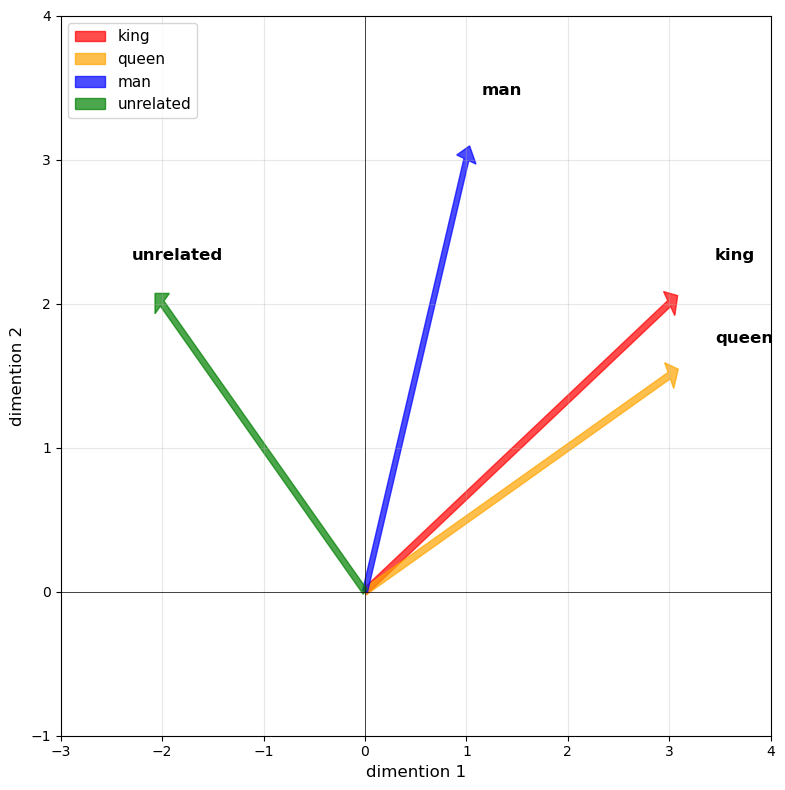


 관찰:
- king과 queen: 유사한 방향 → 높은 유사도
- king과 unrelated: 거의 수직 → 낮은 유사도


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def cosine_similarity(v1, v2):
    """코사인 유사도 계산"""
    dot_product = np.dot(v1, v2)
    norm1 = np.linalg.norm(v1)  # 벡터의 크기(길이, norm) 계산 
    norm2 = np.linalg.norm(v2)
    return dot_product / (norm1 * norm2)

vectors = {
    "king": np.array([3.0, 2.0]),      # 상단 우측
    "queen": np.array([3.0, 1.5]),     # king과 유사한 방향
    "man": np.array([1.0, 3.0]),       # 다른 방향
    "unrelated": np.array([-2.0, 2.0]), # 거의 수직
}
# 모든쌍의 코사인 유사도 계산
print("\n 벡터 쌍 간의 코사인 유사도:")
words_list = list(vectors.keys())
for i, w1 in enumerate(words_list):
    for w2 in words_list[i+1:]:
        sim = cosine_similarity(vectors[w1], vectors[w2])
        print(f"{w1:12} vs {w2:12}: {sim:7.4f}")


# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'blue', 'green']
for (word, vec), color in zip(vectors.items(), colors):
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.2, head_length=0.1, 
             fc=color, ec=color, alpha=0.7, label=word, width=0.05)
    ax.text(vec[0]*1.15, vec[1]*1.15, word, fontsize=12, fontweight='bold')

ax.set_xlim(-3, 4)
ax.set_ylim(-1, 4)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('dimention 1', fontsize=12)
ax.set_ylabel('dimention 2', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

print("\n 관찰:")
print("- king과 queen: 유사한 방향 → 높은 유사도")
print("- king과 unrelated: 거의 수직 → 낮은 유사도")


In [ ]:
%conda install gensim

In [ ]:
# 단어를 의미가 반영된 벡터로 변환하는 알고리즘
import gensim.downloader as api
import numpy as np
# Glove 모델 (50차원)
wv = api.load('glove-wiki-gigaword-50')

In [ ]:
 # 특정 단어의 벡터 추출
test_word = 'king'      # 분석하고 싶은 단어 선정
vec = wv[test_word]     # wv라는 거대한 단어-벡터 사전에서 'king'이라는 키(key)를 사용해 'king'의 의미를 담고 있는 숫자 벡터를 꺼내 vec 변수에 저장
print(f'단어 : {test_word}')
print(f'백터 차원 : {len(vec)}')    # 'king' 벡터가 몇 개의 숫자로 이루어져 있는지(즉, 몇 차원인지) 확인
print(f'백터 (앞에서 10개) : {vec[:10]}')   #  50개의 숫자를 모두 보기엔 너무 기므로, vec[:10]을 통해 앞에서 10개만 샘플로 출력해 벡터가 어떻게 생겼는지 확인
print(f'백터 타입 : {type(vec)}')
print(f'백터 범위 : {vec.min():.4f} {vec.max():.4f}')
# 모델정보
print(f'학습된 단어개수 {len(wv)}') # 모델이 총 몇 개의 단어에 대한 벡터 정보를 가지고 있는지 확인
print(f'임베딩 차원 {wv.vector_size}')  # 모델에 저장된 벡터들이 모두 몇 차원인지를 알려주는 속성
print(f'모델의 종류 {type(wv)}')
# 유사한 단어 찾기
print(f'{test_word}와 유사한 상위 5개 단어')
similar_words = wv.most_similar(test_word, topn=5)
# most_similar 기능
    # 1. 내부적으로 'king'의 벡터를 가져온다
    # 2. 모델이 아는 **모든 단어(40만 개)**의 벡터와 'king' 벡터의 코사인 유사도를 각각 계산
    # 3. 계산된 유사도 점수가 높은 순서대로 모든 단어를 정렬
    # 4. topn=5 설정에 따라, 정렬된 목록에서 가장 상위에 있는 5개의 단어를 결과로 반환
similar_words

단어 : king
백터 차원 : 50
백터 (앞에서 10개) : [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]
백터 타입 : <class 'numpy.ndarray'>
백터 범위 : -2.2230 1.9927
학습된 단어개수 400000
임베딩 차원 50
모델의 종류 <class 'gensim.models.keyedvectors.KeyedVectors'>
king와 유사한 상위 5개 단어


[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746229767799377),
 ('emperor', 0.7736246585845947),
 ('son', 0.7667193412780762)]